# 1. Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CSV dosyasını oku
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")



In [2]:
# Veri setinin ilk 5 satırını görüntüleyelim
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Veri tipleri, eksik değer var mı gibi bilgileri verir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Sayısal sütunlara ait özet istatistikler (ortalama, std, min, max vs.)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- Veri setinde toplam 12 sütun ve 918 adet gözlem var.
- Tüm sütunlarda eksik veri bulunmuyor. (Eğer varsa, onları bir sonraki adımda inceleyeceğiz.)
- Sayısal değişkenlerin minimum ve maksimum değerleri, aykırı değer olup olmadığı hakkında fikir veriyor.

Veri Setine Genel Bakış
Veri setinde toplam 12 sütun ve 918 gözlem (satır) bulunmaktadır.

info() çıktısına göre eksik değer bulunmamaktadır.

describe() fonksiyonu ile elde edilen özet istatistiklere göre:

Age (yaş) değişkeni 28 ile 77 arasında dağılmıştır, ortalaması yaklaşık 53’tür.

Cholesterol (kolesterol) için minimum değer 0, bu muhtemelen eksik ya da yanlış girilmiş bir değerdir ve veri temizleme aşamasında değerlendirilmelidir.

MaxHR (maksimum kalp atış hızı) değeri 60 ile 202 arasında değişiyor; yüksek varyasyon olabilir.

HeartDisease değişkeni hedef (bağımlı) değişkendir ve 0 (hastalık yok) ile 1 (hastalık var) değerlerini alır.

**Eksik ve Aykırı Değer Analizi**

Eksik Değerler:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


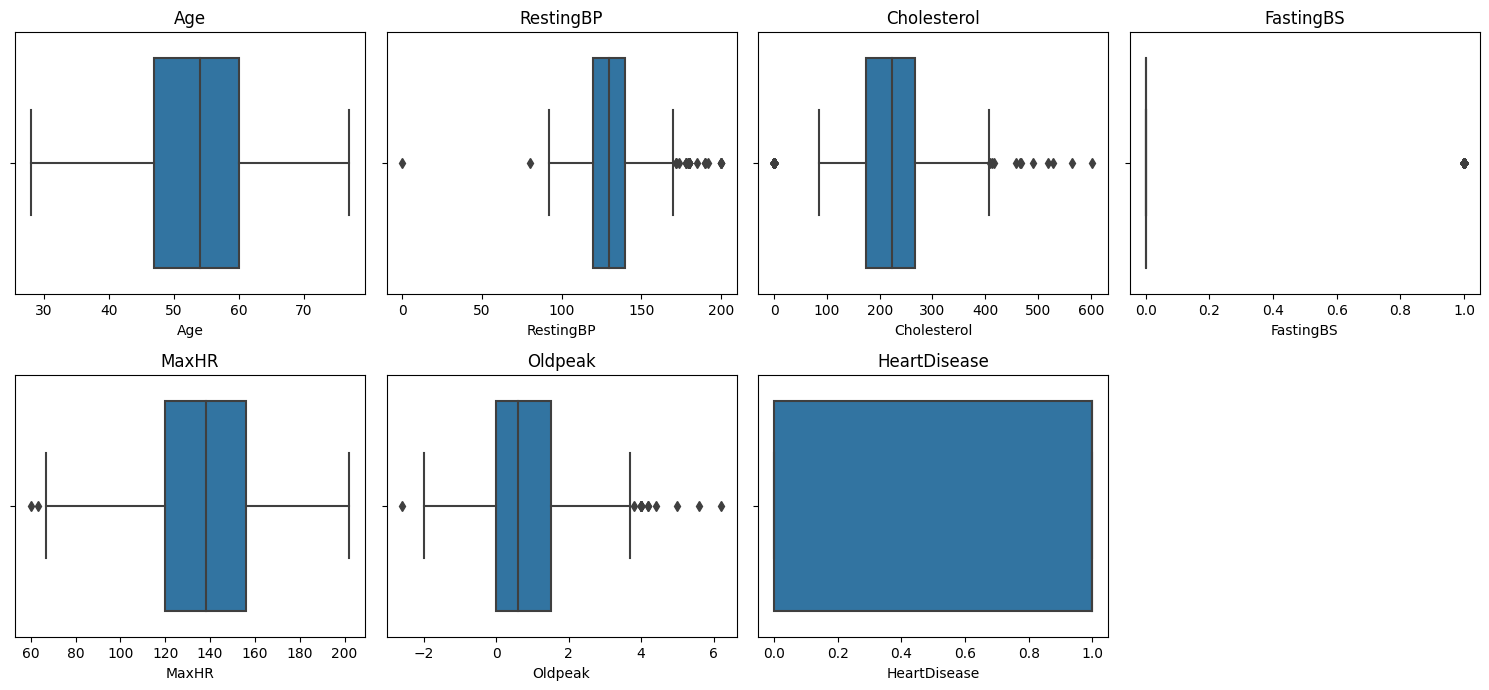

In [5]:
# Eksik değer kontrolü
missing_values = df.isnull().sum()
print("Eksik Değerler:\n", missing_values)

# Aykırı değerleri boxplot ile görselleştirelim (sayısal sütunlar için)
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


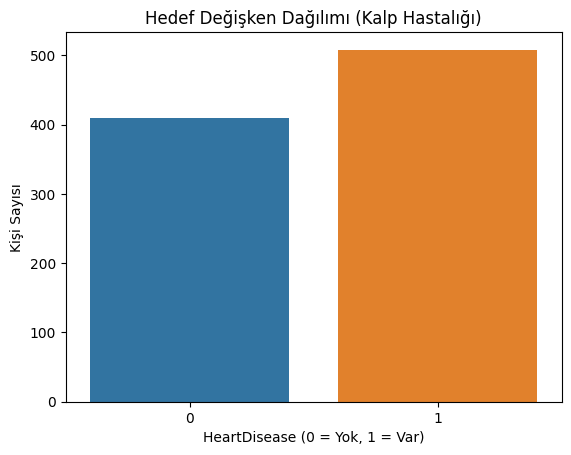

In [6]:
# Hedef değişkenin dağılımı
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HeartDisease', data=df)
plt.title("Hedef Değişken Dağılımı (Kalp Hastalığı)")
plt.xlabel("HeartDisease (0 = Yok, 1 = Var)")
plt.ylabel("Kişi Sayısı")
plt.show()


- HeartDisease sütunu, veri setinin hedef değişkenidir.
- 0: Kalp hastalığı yok  
- 1: Kalp hastalığı var  
- Grafikte, kalp hastalığı olan ve olmayan kişi sayılarının dağılımını görüyoruz.
- Dengesiz bir dağılım olup olmadığını kontrol etmek önemlidir. Bu durum, sınıflandırma modellerinin başarısını etkileyebilir.

*Aşağıya iki örnek ile*
- Göğüs ağrısı tipine göre kalp hastalığı görülme oranı değişiyor. Örneğin, bazı ağrı tipleri daha yüksek risk gösterebilir.
- Cinsiyet değişkeninde erkeklerde kalp hastalığı oranı daha yüksek görünüyor olabilir.
- Egzersiz sonrası göğüs ağrısı yaşayan bireylerde kalp hastalığı olma ihtimali daha yüksek olabilir.

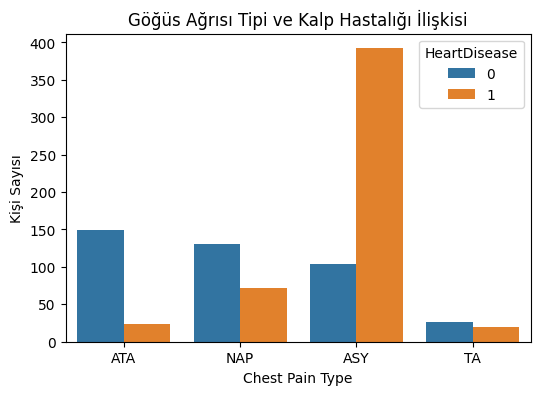

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title("Göğüs Ağrısı Tipi ve Kalp Hastalığı İlişkisi")
plt.xlabel("Chest Pain Type")
plt.ylabel("Kişi Sayısı")
plt.legend(title="HeartDisease")
plt.show()

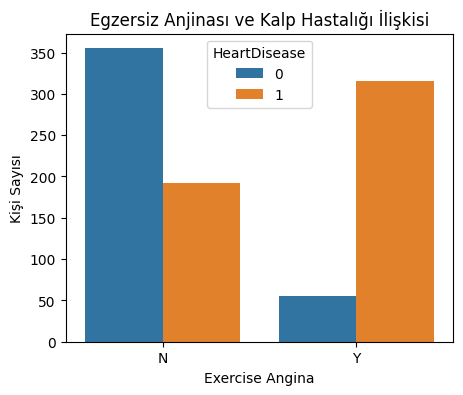

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df)
plt.title("Egzersiz Anjinası ve Kalp Hastalığı İlişkisi")
plt.xlabel("Exercise Angina")
plt.ylabel("Kişi Sayısı")
plt.legend(title="HeartDisease")
plt.show()


**Sayısal Değişkenlerin Hedefle İlişkisi**

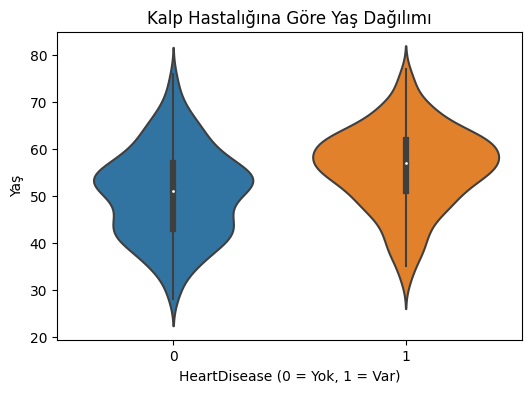

In [9]:
plt.figure(figsize=(6,4))
sns.violinplot(x='HeartDisease', y='Age', data=df)
plt.title("Kalp Hastalığına Göre Yaş Dağılımı")
plt.xlabel("HeartDisease (0 = Yok, 1 = Var)")
plt.ylabel("Yaş")
plt.show()


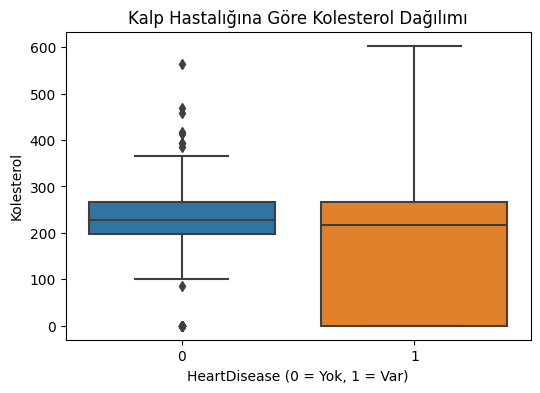

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Kalp Hastalığına Göre Kolesterol Dağılımı")
plt.xlabel("HeartDisease (0 = Yok, 1 = Var)")
plt.ylabel("Kolesterol")
plt.show()


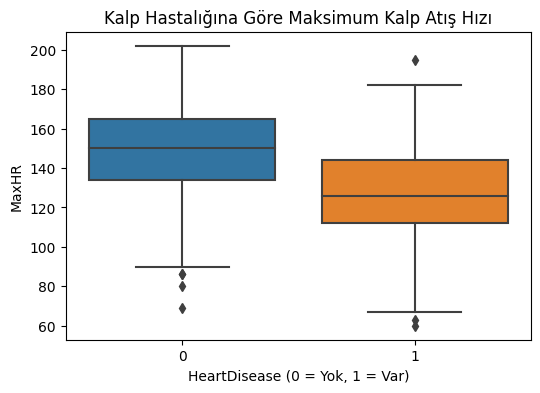

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title("Kalp Hastalığına Göre Maksimum Kalp Atış Hızı")
plt.xlabel("HeartDisease (0 = Yok, 1 = Var)")
plt.ylabel("MaxHR")
plt.show()


- Kalp hastalığı olan bireylerin yaş ortalaması biraz daha yüksek olabilir.
- Kolesterol seviyelerinde çok belirgin bir fark olmayabilir; ancak bazı yüksek değerler dikkat çekebilir.
- Maksimum kalp atış hızında kalp hastalığı olmayan bireylerde daha yüksek değerler gözlemlenebilir.

**Korelasyon Matrisi ve Isı Haritası**

In [12]:
# Sayısal sütunları seçelim
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisi
correlation_matrix = numeric_cols.corr()

# Korelasyon matrisi yazdır
print("Korelasyon Matrisi:\n", correlation_matrix)


Korelasyon Matrisi:
                    Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


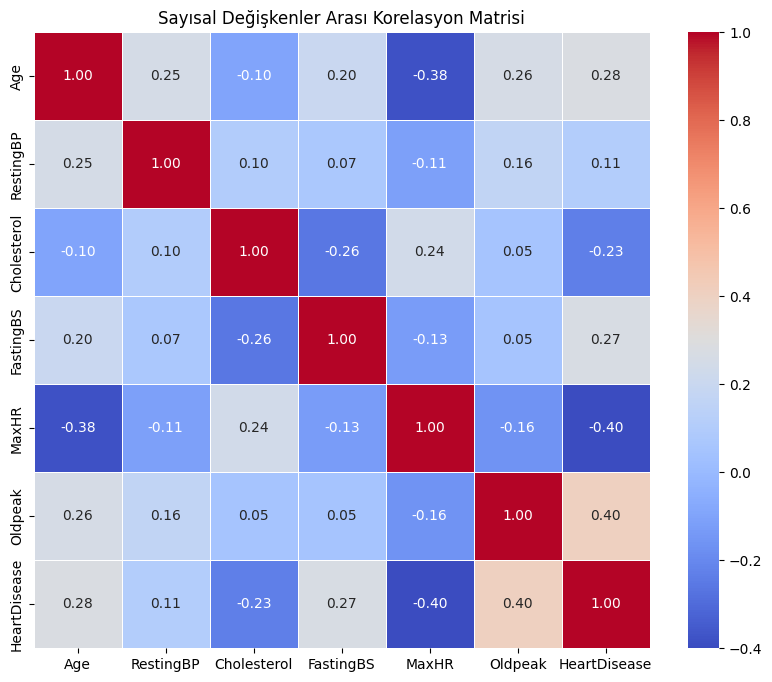

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()


- `Oldpeak` ve `ExerciseAngina` ile `HeartDisease` arasında pozitif korelasyon olabilir. Bu, bu değişkenlerin hastalıkla ilişkili olabileceğini gösterebilir.
- `MaxHR` ile `HeartDisease` arasında negatif korelasyon olabilir, yani kalp hastalığı olan kişiler genellikle daha düşük maksimum kalp atış hızına sahiptir.
- Korelasyonun +1 veya -1'e yakın olması güçlü ilişkiyi, 0’a yakın olması ise ilişkisizliği gösterir.

** Kategorik Değişkenleri Listeleyelim**

In [14]:
# Kategorik (object tipindeki) sütunları seçelim
categorical_cols = df.select_dtypes(include=['object']).columns
print("Kategorik Değişkenler:\n", categorical_cols)

Kategorik Değişkenler:
 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


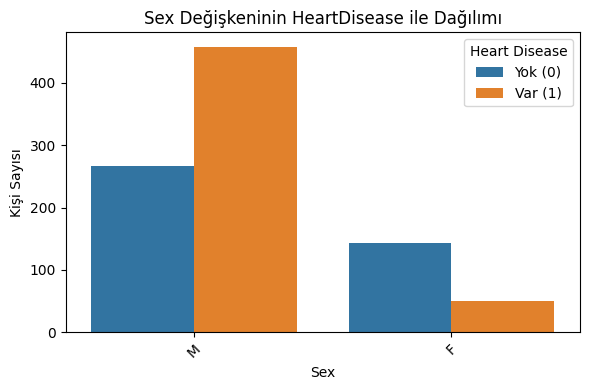

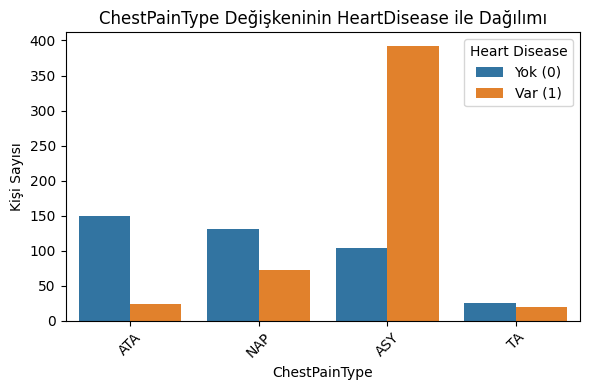

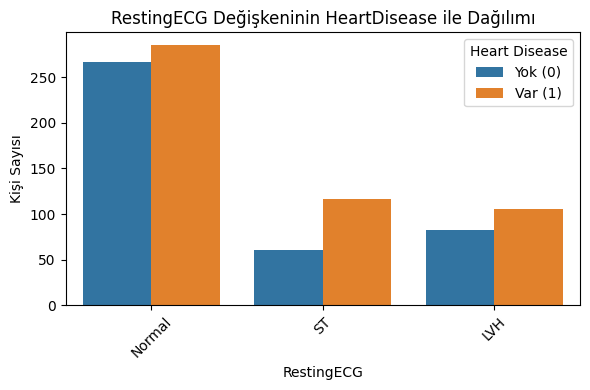

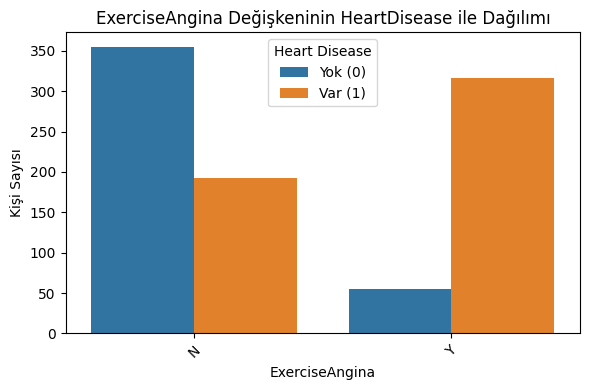

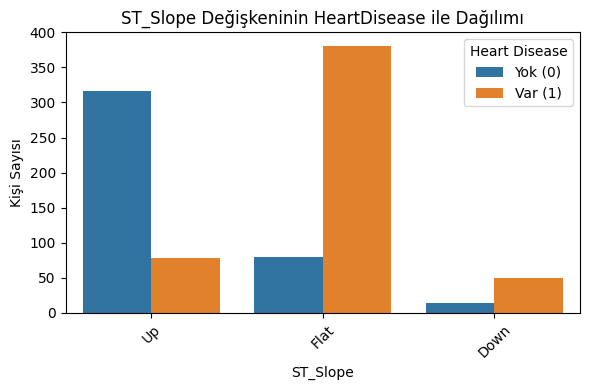

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="HeartDisease")
    plt.title(f"{col} Değişkeninin HeartDisease ile Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Kişi Sayısı")
    plt.legend(title='Heart Disease', labels=["Yok (0)", "Var (1)"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


- `ChestPainType` değişkeninde "ASY" (Atypical angina) türüne sahip bireylerde kalp hastalığı oranı daha yüksek görünüyor.
- `ExerciseAngina` özelliği "Y" (Evet) olan bireylerin çoğu kalp hastalığına sahip.
- `ST_Slope` değişkeninde "Flat" eğrisi olan bireyler arasında kalp hastalığı oranı artmış gibi gözükmekte.

Bu gözlemler, modellemeye geçmeden önce hangi kategorik değişkenlerin önemli olabileceğini anlamamıza yardımcı olur.


# 2. Veri Ön İşleme ve Dönüştürme (Encoding, Standardizasyon)

In [16]:
# One-hot encoding işlemi
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [17]:
# Özellikler (X) ve hedef değişken (y) ayrımı
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Eğitim veri sayısı:", X_train.shape[0])
print("Test veri sayısı:", X_test.shape[0])


Eğitim veri sayısı: 734
Test veri sayısı: 184


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Eğitimi sadece eğitim verisiyle yapıyoruz
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
print("Ölçeklendirilmiş X_train örneği:\n", X_train_scaled[:5])


Ölçeklendirilmiş X_train örneği:
 [[ 0.9700116   0.3390158   0.12713661  1.83549656 -0.32451998  0.31704567
   0.51740017  2.0969165  -0.51740017 -0.24007684 -1.24799491  2.05077394
   1.20277457  0.98110491 -0.86224587]
 [ 0.12202766 -1.26603098  0.09944299  1.83549656  1.68983661 -0.44035554
   0.51740017  2.0969165  -0.51740017 -0.24007684 -1.24799491  2.05077394
  -0.83141099 -1.01925899  1.15976201]
 [ 0.54601963 -0.15910217  1.24411262  1.83549656 -0.24704473  0.60107112
  -1.93273999 -0.47689071 -0.51740017 -0.24007684 -1.24799491  2.05077394
   1.20277457  0.98110491 -0.86224587]
 [-0.72595627  1.50129106 -1.87603526 -0.5448117  -0.47947049 -0.81905614
   0.51740017 -0.47689071 -0.51740017 -0.24007684  0.80128532 -0.48762079
   1.20277457  0.98110491 -0.86224587]
 [-0.4079623   0.67109445 -1.87603526  1.83549656  0.10159391 -0.15633009
   0.51740017 -0.47689071 -0.51740017 -0.24007684  0.80128532 -0.48762079
   1.20277457  0.98110491 -0.86224587]]


# 3. Algoritma Seçimi & Hiperparametre Optimizasyonu 

**1. Doğrusal Regresyon (Linear Regression)**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modeli kur ve eğit
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Tahmin yap
y_pred_lin = lin_reg.predict(X_test_scaled)

# Tahminleri 0-1'e yuvarla
y_pred_lin_class = [1 if prob >= 0.5 else 0 for prob in y_pred_lin]

# Sonuçlar
print("Linear Regression Sınıflandırma Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred_lin_class))
print("Classification Report:\n", classification_report(y_test, y_pred_lin_class))


Linear Regression Sınıflandırma Sonuçları:
Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        82
           1       0.88      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



*Linear Regression – Değerlendirme
Accuracy (Doğruluk): %89.1 — Modelin genel olarak %89 oranında doğru tahmin yaptığı anlamına gelir.

Precision:

Sınıf 0 (Hasta değil) için: %91 → Modelin "0" dediği kişilerin %91’i gerçekten hasta değil.

Sınıf 1 (Hasta) için: %88 → Modelin "1" dediği kişilerin %88’i gerçekten hasta.

Recall:

Sınıf 0: %84 → Gerçekten hasta olmayanların %84’ünü doğru buldu.

Sınıf 1: %93 → Gerçek hastaların %93’ünü doğru tespit etti.*

 Linear Regression her ne kadar sınıflandırma için tasarlanmamış olsa da, tahminleri 0.5 üzeri/altı olarak sınıflandırdığımız için işe yarar sonuçlar verdi. Ancak gerçek sınıflandırma problemlerinde Logistic Regression gibi algoritmalar tercih edilmelidir.

**2. Lojistik Regresyon (Logistic Regression)**

In [22]:
from sklearn.linear_model import LogisticRegression

# Modeli kur ve eğit
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Tahmin yap
y_pred_log = log_reg.predict(X_test_scaled)

# Sonuçlar
print("Logistic Regression Sınıflandırma Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Sınıflandırma Sonuçları:
Accuracy: 0.8858695652173914
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



Accuracy yaklaşık %88.6, yani doğru tahmin oranı yüksek.

0 ve 1 sınıflarına dair precision, recall ve f1-score değerleri de dengeli ve güçlü görünüyor.

**3. Karar Ağaçları**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modeli kur ve eğit
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)

# Tahmin yap
y_pred_dt = dt_clf.predict(X_test_scaled)

# Sonuçları yazdır
print("Decision Tree Sınıflandırma Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Sınıflandırma Sonuçları:
Accuracy: 0.7880434782608695
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75        82
           1       0.79      0.84      0.82       102

    accuracy                           0.79       184
   macro avg       0.79      0.78      0.78       184
weighted avg       0.79      0.79      0.79       184



Accuracy (Doğruluk): %78.8 — Model genel olarak yaklaşık %79 doğrulukla tahmin yapabiliyor.

Precision:

Sınıf 0 (Hasta değil): %79 → Model "0" dediğinde yaklaşık %79 doğru.

Sınıf 1 (Hasta): %79 → Model "1" dediğinde yaklaşık %79 doğru.

Recall:

Sınıf 0: %72 → Gerçek "0" sınıfının %72’sini yakalayabiliyor.

Sınıf 1: %84 → Gerçek "1" sınıfının %84’ünü yakalaması gayet iyi.



*Karar ağacı, Linear ve Logistic Regression modellerine kıyasla biraz daha düşük performans gösteriyor. Accuracy ve f1-score açısından yaklaşık 10 puan fark var.Recall açısından hasta (1) sınıfını yakalamada (%84) kötü değil, ancak Logistic Regression (%93) daha başarılı.*


**4.k-En Yakın Komşu (KNN)**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modeli oluştur (k=5 varsayılan)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

# Tahmin yap
y_pred_knn = knn_clf.predict(X_test_scaled)

# Sonuçları yazdır
print("KNN Sınıflandırma Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Sınıflandırma Sonuçları:
Accuracy: 0.8858695652173914
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



KNN – Değerlendirme
Accuracy (Doğruluk): %88.6 — Genel olarak çok iyi bir başarı.

Precision:

Sınıf 0: %89 — Model "0" dediğinde %89 doğrulukla doğru tahmin yapıyor.

Sınıf 1: %89 — Model "1" dediğinde %89 doğrulukla doğru tahmin yapıyor.

Recall:

Sınıf 0: %85 — Gerçek "0" sınıfının %85’ini yakalıyor.

Sınıf 1: %91 — Gerçek "1" sınıfının %91’ini yakalaması oldukça iyi.

*KNN, özellikle sınıf 1 için recall’da Logistic Regression’a çok yakın bir performans sergiliyor.

Doğruluk ve f1-score değerleri hem Linear hem de Decision Tree modellerinden üstün.

Modelin parametresi olan k değeri üzerinde denemeler yaparak performansı biraz daha iyileştirebiliriz.

KNN, veri seti küçük ve orta ölçekliyse çok etkili çalışır; büyük veri setlerinde daha yavaş olabilir.*

**5.SVM (Support Vector Machines)**

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Modeli oluştur ve eğit (varsayılan kernel='rbf')
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Tahmin yap
y_pred_svm = svm_clf.predict(X_test_scaled)

# Sonuçları yazdır
print("SVM Sınıflandırma Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Sınıflandırma Sonuçları:
Accuracy: 0.9021739130434783
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        82
           1       0.88      0.95      0.92       102

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



SVM – Değerlendirme
Accuracy (Doğruluk): %90.2 — En yüksek doğruluk oranı, modeller arasında öne çıkıyor.

Precision:

Sınıf 0 (Hasta değil): %93 — Model "0" dediğinde %93 oranında doğru tahmin yapıyor.

Sınıf 1 (Hasta): %88 — "1" dediğinde %88 doğruluk var.

Recall:

Sınıf 0: %84 — Gerçek "0" sınıfının %84’ünü doğru yakalıyor.

Sınıf 1: %95 — Gerçek hasta olanların %95’ini yakalaması çok iyi, yani az hata yapıyor.

SVM, şu ana kadar test ettiğimiz modeller arasında en iyi performansı verdi.

Özellikle hasta sınıfını (1) yüksek recall (%95) ile yakalayabilmesi kritik, çünkü gerçek hastaları kaçırmamak önemli.

Precision ve recall dengesi çok iyi, bu da modelin hem doğru pozitif hem de doğru negatif tahminlerde başarılı olduğunu gösteriyor.

SVM’nin karmaşık verilerde iyi çalışması ve kernel ile esnekliği burada etkili olmuş olabilir.



# Hiperparametre optimizasyonu için SVM'yi tercih ettim. 

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Model ve parametre aralıkları
svm = SVC(random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid Search - 5 katlı çapraz doğrulama ile
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Eğit
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreler
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi çapraz doğrulama doğruluğu:", grid_search.best_score_)

# En iyi model ile test setinde tahmin yap
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

# Performans raporu
print("Test seti doğruluğu:", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))


En iyi parametreler: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
En iyi çapraz doğrulama doğruluğu: 0.8623334265212934
Test seti doğruluğu: 0.9021739130434783
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        82
           1       0.88      0.95      0.92       102

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



> Cross Validation Accuracy (%86.23), modelin farklı veri alt kümelerinde tutarlı ve sağlam çalıştığını gösteriyor.

> Test Accuracy (%90.21) ise modelin gerçek veri üzerinde de yüksek başarı sağladığını kanıtlıyor.

> Precision, recall ve f1-score değerleri de hem hasta olan (1) hem de olmayan (0) sınıflar için dengeli ve yüksek.

> Özellikle hasta (1) sınıfında recall %95 gibi çok yüksek, yani model hastaları neredeyse kaçırmıyor. Bu tıbbi sınıflandırmalarda çok önemli.

# 4. Model Değerlendirme 

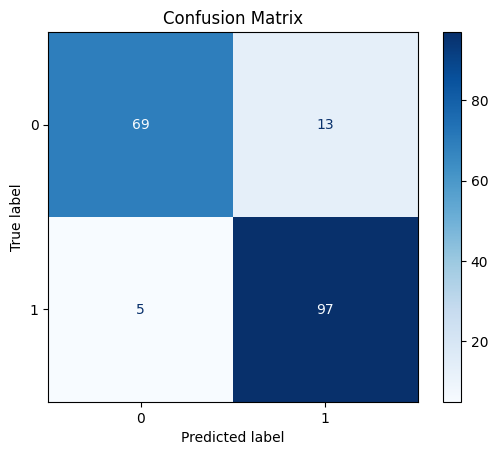

Accuracy (Doğruluk): 0.9022
Precision (Kesinlik): 0.8818
Recall (Duyarlılık): 0.9510
F1 Score: 0.9151

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        82
           1       0.88      0.95      0.92       102

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Optimize edilmiş model ile tahminler
y_pred = best_svm.predict(X_test_scaled)

# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Doğruluk, Kesinlik, Duyarlılık, F1 Skoru
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy (Doğruluk): {accuracy:.4f}")
print(f"Precision (Kesinlik): {precision:.4f}")
print(f"Recall (Duyarlılık): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detaylı sınıflandırma raporu
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Model Değerlendirme Sonuçları Yorumu
Doğruluk (Accuracy): %90.22
Model, test verisindeki örneklerin %90’dan fazlasını doğru sınıflandırmayı başarmış. Bu genel anlamda çok iyi bir performans.

Kesinlik (Precision): %88.18
Modelin "hasta" dediği örneklerin yaklaşık %88’i gerçekten hasta. Yanlış pozitiflerin yani sağlıklı kişilerin hasta olarak sınıflandırılma oranının düşük olduğunu gösterir.

Duyarlılık (Recall): %95.10
Gerçek hasta olanların %95’ini model doğru tespit etmiş. Bu, hasta vakaların çoğunun kaçırılmadığı anlamına gelir ki özellikle sağlıkta kritik bir kriterdir.

F1 Skoru: %91.51
Precision ve Recall dengeli ve yüksek. Model hem hasta vakaları yakalamada hem de yanlış pozitifleri azaltmada başarılı.

Sınıflar Bazında Performans:
Sınıf 0 (Hasta değil): Recall biraz daha düşük ( %84 ), bu da bazı sağlıklı kişilerin yanlışlıkla hasta sınıfına dahil edilme ihtimalini gösteriyor.
Sınıf 1 (Hasta): Çok yüksek recall (%95) ile gerçek hastalar büyük oranda yakalanmış.